$\#\#\#\#\#\#\#$ Llibreries $\#\#\#\#\#\#\#$

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

%

# Data

We load the cleaned data set from exercise 5:

In [3]:
df = pd.read_csv('ufc-strikes-by-round-data_CLEAN.csv')

There have been some error in the saving, it has created a new column of index, we delete it.

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,roundinfo_id,fight_id,fight_round,fighter_id,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
0,9532,1,5130,1,14,28,50,14,28,0,...,1,1,1,1,24,11,4,3,0,0
1,9532,1,5131,0,10,19,52,10,19,0,...,1,1,4,3,15,8,4,2,0,0
2,9533,1,5132,0,10,16,62,28,36,0,...,2,2,0,0,13,8,1,1,2,1
3,9533,1,5133,0,44,72,61,64,111,3,...,1,1,2,1,7,2,1,1,64,41
4,9533,2,5132,0,7,11,63,12,16,0,...,2,2,0,0,11,7,0,0,0,0


# Nivell 1

## Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [6]:
df.columns

Index(['roundinfo_id', 'fight_id', 'fight_round', 'fighter_id', 'kd',
       'sig_str_made', 'sig_str_attempted', 'sig_str_percent',
       'total_str_made', 'total_str_attempted', 'td_made', 'td_attempted',
       'td_percent', 'pass', 'rev', 'head_attempted', 'head_made',
       'body_attempted', 'body_made', 'leg_attempted', 'leg_made',
       'distance_attempted', 'distance_made', 'clinch_attempted',
       'clinch_made', 'ground_attempted'],
      dtype='object')

In [7]:
# mode
df.total_str_made.mode()

0    37
dtype: int64

In [8]:
# median
df.total_str_made.median()

39.0

In [9]:
# standard deviation
df.total_str_made.std()

26.070275118007945

In [10]:
# mean
df.total_str_made.mean()

42.37165119363395

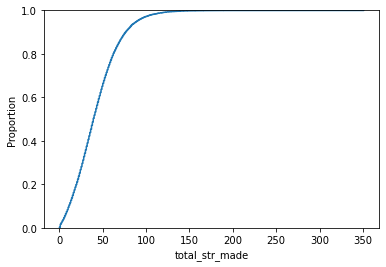

In [12]:
sns.ecdfplot(df, x='total_str_made')
plt.show()

Cumulative distribution of the column: total strikes made.

## Exercici 2 : Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

correlation matrix:
 [[1.         0.60218607]
 [0.60218607 1.        ]]


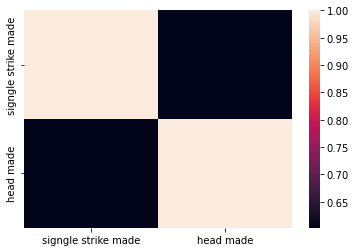

In [13]:
x = np.corrcoef(df.sig_str_made, df.head_made)
print('correlation matrix:\n {}'.format(x))
xtik = ['signgle strike made','head made']
ytik = ['signgle strike made','head made']
sns.heatmap(x, xticklabels=xtik, yticklabels=ytik)
plt.show()

# Nivell 2

## Exercici 3: Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [14]:
x = df.corr()

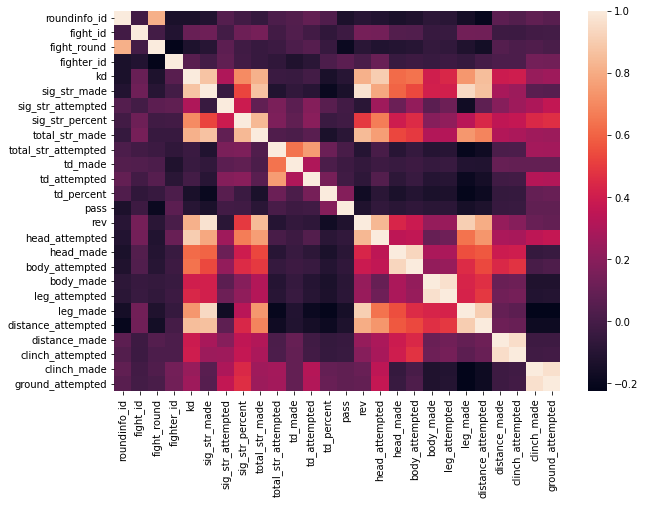

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(x)
plt.show()

# Nivell 3

## Exercici 4: Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [23]:
# geometric mean
stats.gmean(df.sig_str_attempted)

0.0

In [24]:
# harmonic mean
stats.hmean(df.sig_str_attempted)

0.0

The two results above are because of the unlucky chance that we have choosen a dataset with some values equal to 0, in all its columns.

Since we have some values equal to 0, when calcuating the geometric mean, since its formula is:

$$\sqrt[N]{\Pi x}$$

Where N is the total number of values, x is each value and $\Pi$ is the productory of all values x. If there is a single value equal to 0, then the geometric mean it is zero, by definition.

The same applies to the harmonic mean, if a value on the data set is 0, then the harmonic mean it is zero. Its formual is:

$$H = \frac{N}{\left(\sum_{i=1}^{N} x_{i}\right)^{-1}}$$

where N is the total number of values and x is each value.